In [1]:
from jorge_acquire import *
from jorge_model import *
from jorge_prepare import *

# Acquire

In [2]:
links = get_links_to_bills()
df = acquire_bills(links, filename="master_df.csv")

# Prepare

In [3]:
df = prepare_bills_for_processing(df)

/Users/jorgelopez/codeup-data-science/political_parser/jorge_prepare.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bill_text = df.bill_text.apply(bill_trimmer)


In [4]:
# creating a lemmatized column and cleaning the df
df['lem']= df.bill_text.apply(clean_text)

In [5]:
df['model']= df.lem.apply(join)
df.head()

,sponsor,party,bill_text,lem,model
0,"Torres Small, Xochitl",D,\n\n\n \n To require the Secretary of Homelan...,"[require, homeland, security, develop, plan, i...",require homeland security develop plan increas...
1,"Sewell, Terri A.",D,\n\n\n \nTo amend title XI of the Social Secur...,"[amend, xi, social, security, act, clarify, pa...",amend xi social security act clarify parameter...
2,"Finkenauer, Abby",D,\n\n\n \n To repeal the funding authorization ...,"[repeal, funding, authorization, sunset, total...",repeal funding authorization sunset total fund...
3,"Casten, Sean",D,\n\n\n \nTo direct the Federal Energy Regulato...,"[direct, federal, energy, regulatory, commissi...",direct federal energy regulatory commission fi...
4,"LaMalfa, Doug",R,\n\n\n \n To establish a categorical exclusio...,"[establish, categorical, exclusion, electric, ...",establish categorical exclusion electric utili...


In [6]:
# splitting the data
train, X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, 'party')

In [7]:
train.shape

(14858, 5)

In [8]:
def word_freq_new_df(df, clean_text):
    '''
    This function takes in a dataframe and the clean_text function
    to produce a new dataframe of words and word frequency rates.
    '''
    # creating a list of words for bill text and political parties
    all_bill_words = clean_text(' '.join(df['bill_text']))
    democrat_words = clean_text(' '.join(df[df['party'] == 'D']['bill_text']))
    republican_words = clean_text(' '.join(df[df['party'] == 'R']['bill_text']))
    ind_words = clean_text(' '.join(df[df['party'] == 'I']['bill_text']))
    # The value counts for the bill_text and political party words
    bill_counts = pd.Series(all_bill_words).value_counts()
    democrat_counts = pd.Series(democrat_words).value_counts()
    republican_counts = pd.Series(republican_words).value_counts()
    ind_counts = pd.Series(ind_words).value_counts()
    # concatinating the bill_text and political parties into one dataframe
    word_freq = pd.concat([bill_counts, democrat_counts, republican_counts, ind_counts], axis=1)
    word_freq.columns = ['bills', 'demo', 'repub', 'ind']
    # eliminating the most and least frequent words to reveal a more accurate depiction of specific political
    # parties and their respective top words
    word_freq = word_freq.loc[word_freq['bills'] <= 200]
    word_freq = word_freq.loc[word_freq['bills'] >= 25]
    # filling the nan values with zero and making the df columns integers versus floats
    word_freq.fillna(0, inplace=True)
    word_freq = word_freq.astype('int')
    return word_freq

In [9]:
# creating word_freq df
word_freq = word_freq_new_df(train, clean_text)

In [10]:
word_freq.shape

(11829, 4)

In [11]:
word_freq.head(50)

,bills,demo,repub,ind
paul,200,168,32,0
algorithm,200,147,52,1
fundingthe,200,157,41,2
competitor,200,132,67,1
consolidate,200,139,61,0
actthe,200,147,49,4
mac,200,155,42,3
nutrient,200,180,20,0
contaminant,200,174,26,0
librarian,200,169,31,0


In [12]:
def demo_vis(word_freq):
    '''
    This function creates a bar plot of the most common words appearing for democrats.
    '''
    
    #Plot the most frequent democratic words and color by label
    word_freq.sort_values('demo', ascending=False).head(5).plot.bar(figsize=(16, 9))
    plt.title('Most Common Words for Democrats')
    plt.ylabel('Count')
    plt.xlabel('Most Common Words')
    plt.xticks(rotation=45)
    return plt.show()

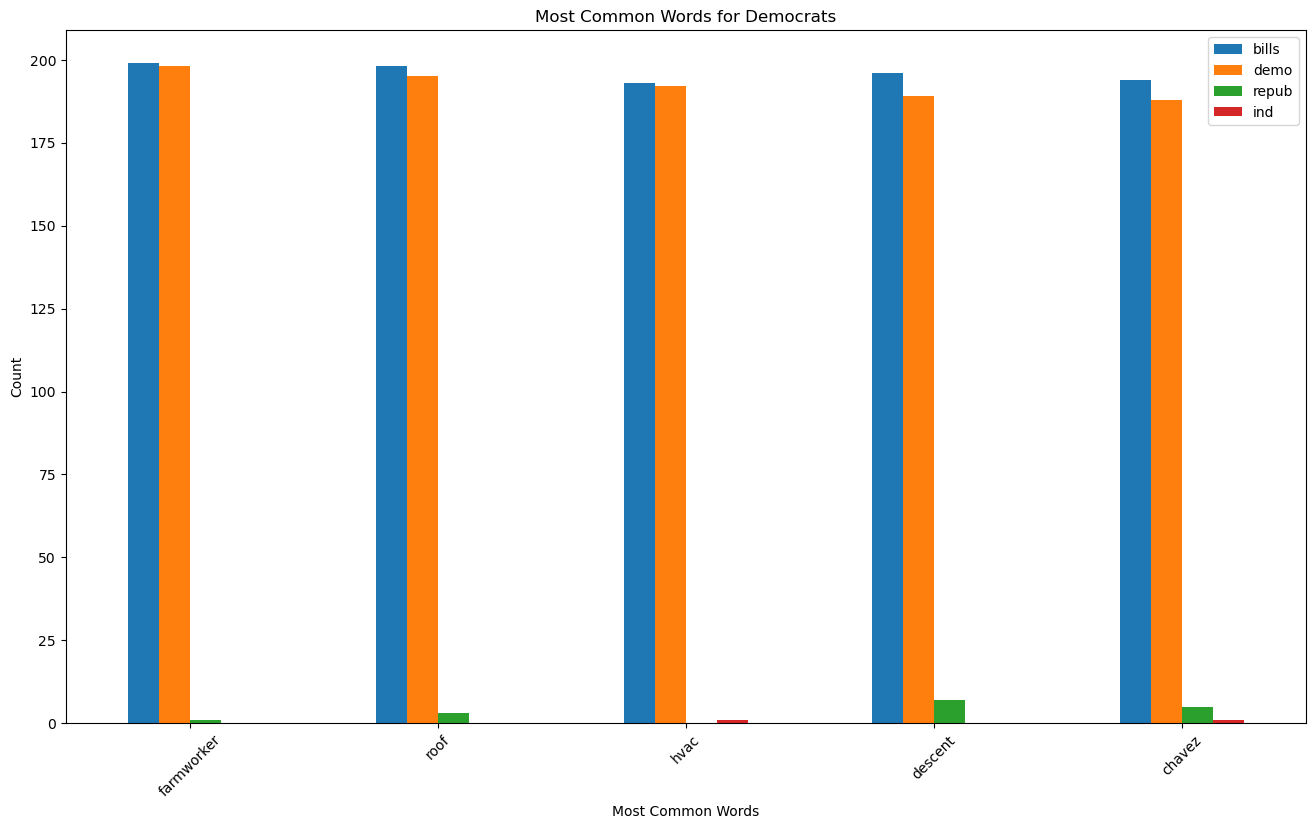

In [13]:
democrat = demo_vis(word_freq)

In [14]:
def repub_vis(word_freq):
    '''
    This function creates a bar plot of the most common words appearing for republicans.
    '''
    
    #Plot the most frequent democratic words and color by label
    word_freq.sort_values('repub', ascending=False).head(5).plot.bar(figsize=(16, 9))
    plt.title('Most Common Words for Republicans')
    plt.ylabel('Count')
    plt.xlabel('Most Common Words')
    plt.xticks(rotation=45)
    return plt.show()

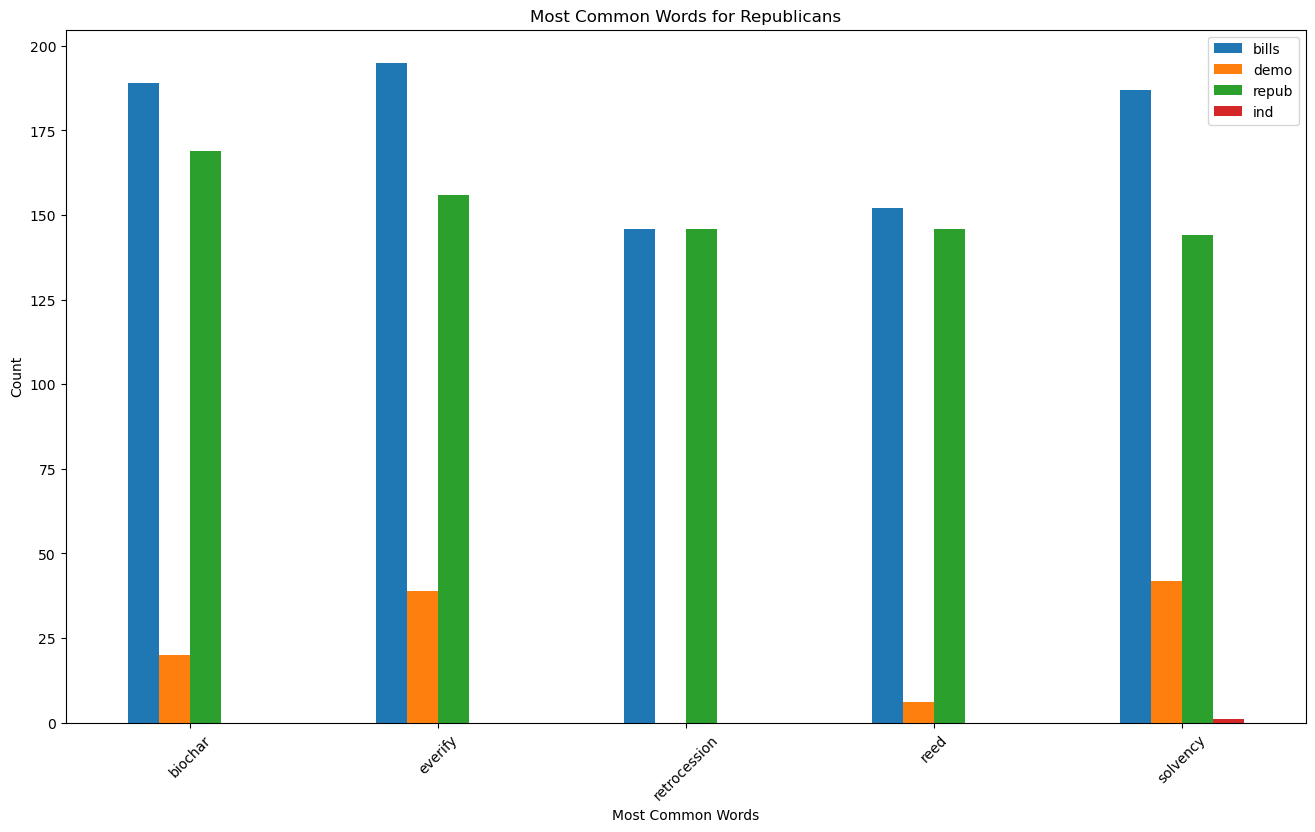

In [15]:
republican = repub_vis(word_freq)

In [63]:
democrat_words = clean_text(' '.join(df[df['party'] == 'D']['bill_text']))
dem_unigrams = pd.Series(nltk.ngrams(democrat_words, 1))
dem_unigrams.head(50)

0          (require,)
1         (homeland,)
2         (security,)
3          (develop,)
4             (plan,)
5         (increase,)
6              (100,)
7          (percent,)
8             (rate,)
9         (scanning,)
10      (commercial,)
11       (passenger,)
12         (vehicle,)
13        (entering,)
14            (land,)
15            (port,)
16           (entry,)
17           (along,)
18          (border,)
19           (using,)
20      (largescale,)
21    (nonintrusive,)
22      (inspection,)
23          (system,)
24         (enhance,)
25          (border,)
26        (security,)
27         (purpose,)
28         (enacted,)
29          (senate,)
30         (america,)
31               (1,)
32             (act,)
33           (cited,)
34        (securing,)
35         (america,)
36            (port,)
37             (act,)
38             (sec,)
39               (2,)
40      (largescale,)
41    (nonintrusive,)
42      (inspection,)
43        (scanning,)
44            (plan,)
45      (g

In [64]:
dem_bigrams = pd.Series(nltk.ngrams(democrat_words, 2))
dem_bigrams.head(50)

0            (require, homeland)
1           (homeland, security)
2            (security, develop)
3                (develop, plan)
4               (plan, increase)
5                (increase, 100)
6                 (100, percent)
7                (percent, rate)
8               (rate, scanning)
9         (scanning, commercial)
10       (commercial, passenger)
11          (passenger, vehicle)
12           (vehicle, entering)
13              (entering, land)
14                  (land, port)
15                 (port, entry)
16                (entry, along)
17               (along, border)
18               (border, using)
19           (using, largescale)
20    (largescale, nonintrusive)
21    (nonintrusive, inspection)
22          (inspection, system)
23             (system, enhance)
24             (enhance, border)
25            (border, security)
26           (security, purpose)
27            (purpose, enacted)
28             (enacted, senate)
29             (senate, america)
30        

In [65]:
dem_trigrams = pd.Series(nltk.ngrams(democrat_words, 3))
dem_trigrams.head(50)

0              (require, homeland, security)
1              (homeland, security, develop)
2                  (security, develop, plan)
3                  (develop, plan, increase)
4                      (plan, increase, 100)
5                   (increase, 100, percent)
6                       (100, percent, rate)
7                  (percent, rate, scanning)
8               (rate, scanning, commercial)
9          (scanning, commercial, passenger)
10          (commercial, passenger, vehicle)
11            (passenger, vehicle, entering)
12                 (vehicle, entering, land)
13                    (entering, land, port)
14                       (land, port, entry)
15                      (port, entry, along)
16                    (entry, along, border)
17                    (along, border, using)
18               (border, using, largescale)
19         (using, largescale, nonintrusive)
20    (largescale, nonintrusive, inspection)
21        (nonintrusive, inspection, system)
22        

In [66]:
dem_quadgrams = pd.Series(nltk.ngrams(democrat_words, 4))
dem_quadgrams.head(50)

0               (require, homeland, security, develop)
1                  (homeland, security, develop, plan)
2                  (security, develop, plan, increase)
3                       (develop, plan, increase, 100)
4                       (plan, increase, 100, percent)
5                       (increase, 100, percent, rate)
6                       (100, percent, rate, scanning)
7                (percent, rate, scanning, commercial)
8              (rate, scanning, commercial, passenger)
9           (scanning, commercial, passenger, vehicle)
10          (commercial, passenger, vehicle, entering)
11                (passenger, vehicle, entering, land)
12                     (vehicle, entering, land, port)
13                       (entering, land, port, entry)
14                          (land, port, entry, along)
15                        (port, entry, along, border)
16                       (entry, along, border, using)
17                  (along, border, using, largescale)
18        

In [67]:
republican_words = clean_text(' '.join(df[df['party'] == 'R']['bill_text']))
rep_unigrams = pd.Series(nltk.ngrams(republican_words, 1))
rep_unigrams.head(50)

0        (establish,)
1      (categorical,)
2        (exclusion,)
3         (electric,)
4          (utility,)
5         (rightsof,)
6              (way,)
7          (purpose,)
8          (enacted,)
9           (senate,)
10         (america,)
11               (1,)
12             (act,)
13           (cited,)
14        (clearing,)
15            (line,)
16           (along,)
17      (electrical,)
18            (risk,)
19            (zone,)
20             (act,)
21             (sec,)
22               (2,)
23      (vegetation,)
24      (management,)
25        (facility,)
26      (inspection,)
27       (operation,)
28     (maintenance,)
29        (relating,)
30        (electric,)
31    (transmission,)
32    (distribution,)
33        (facility,)
34           (right,)
35             (way,)
36          (hazard,)
37            (tree,)
38          (within,)
39              (50,)
40            (foot,)
41        (electric,)
42           (power,)
43     (linesection,)
44        (512a1bii,)
45        

In [68]:
rep_bigrams = pd.Series(nltk.ngrams(republican_words, 2))
rep_bigrams.head(50)

0         (establish, categorical)
1         (categorical, exclusion)
2            (exclusion, electric)
3              (electric, utility)
4              (utility, rightsof)
5                  (rightsof, way)
6                   (way, purpose)
7               (purpose, enacted)
8                (enacted, senate)
9                (senate, america)
10                    (america, 1)
11                        (1, act)
12                    (act, cited)
13               (cited, clearing)
14                (clearing, line)
15                   (line, along)
16             (along, electrical)
17              (electrical, risk)
18                    (risk, zone)
19                     (zone, act)
20                      (act, sec)
21                        (sec, 2)
22                 (2, vegetation)
23        (vegetation, management)
24          (management, facility)
25          (facility, inspection)
26         (inspection, operation)
27        (operation, maintenance)
28         (maintena

In [69]:
rep_trigrams = pd.Series(nltk.ngrams(republican_words, 3))
rep_trigrams.head(50)

0        (establish, categorical, exclusion)
1         (categorical, exclusion, electric)
2             (exclusion, electric, utility)
3              (electric, utility, rightsof)
4                   (utility, rightsof, way)
5                   (rightsof, way, purpose)
6                    (way, purpose, enacted)
7                 (purpose, enacted, senate)
8                 (enacted, senate, america)
9                       (senate, america, 1)
10                         (america, 1, act)
11                           (1, act, cited)
12                    (act, cited, clearing)
13                   (cited, clearing, line)
14                   (clearing, line, along)
15                 (line, along, electrical)
16                 (along, electrical, risk)
17                  (electrical, risk, zone)
18                         (risk, zone, act)
19                          (zone, act, sec)
20                             (act, sec, 2)
21                      (sec, 2, vegetation)
22        

In [70]:
rep_quadgrams = pd.Series(nltk.ngrams(republican_words, 4))
rep_quadgrams.head(50)

0        (establish, categorical, exclusion, electric)
1          (categorical, exclusion, electric, utility)
2             (exclusion, electric, utility, rightsof)
3                   (electric, utility, rightsof, way)
4                    (utility, rightsof, way, purpose)
5                    (rightsof, way, purpose, enacted)
6                      (way, purpose, enacted, senate)
7                  (purpose, enacted, senate, america)
8                        (enacted, senate, america, 1)
9                            (senate, america, 1, act)
10                            (america, 1, act, cited)
11                           (1, act, cited, clearing)
12                        (act, cited, clearing, line)
13                      (cited, clearing, line, along)
14                 (clearing, line, along, electrical)
15                     (line, along, electrical, risk)
16                     (along, electrical, risk, zone)
17                       (electrical, risk, zone, act)
18        

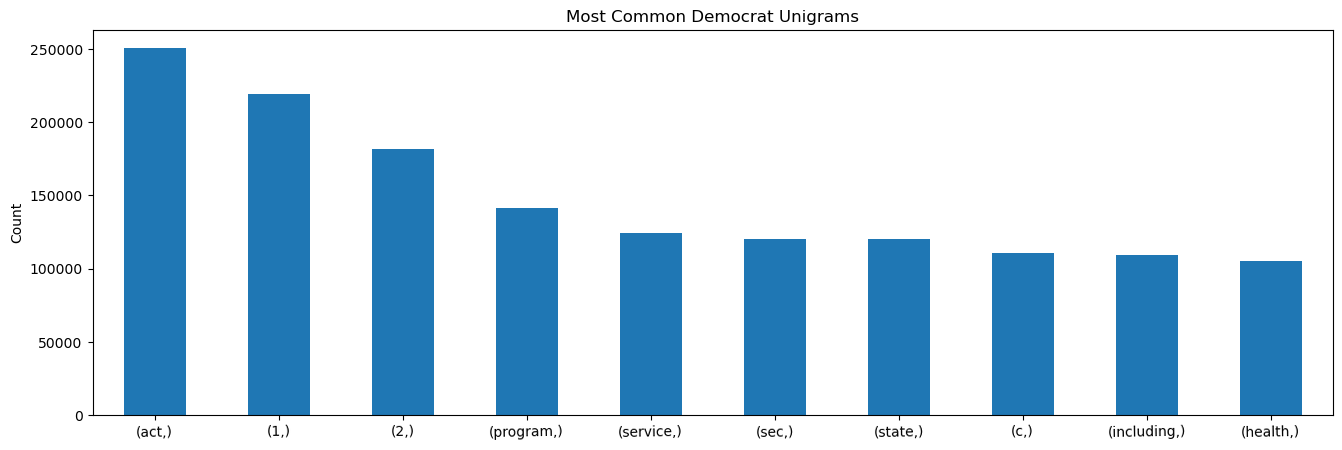

In [44]:
top_dem_unigrams = dem_unigrams.value_counts().head(10)
top_dem_unigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Democrat Unigrams')
plt.ylabel('Count')
plt.show()

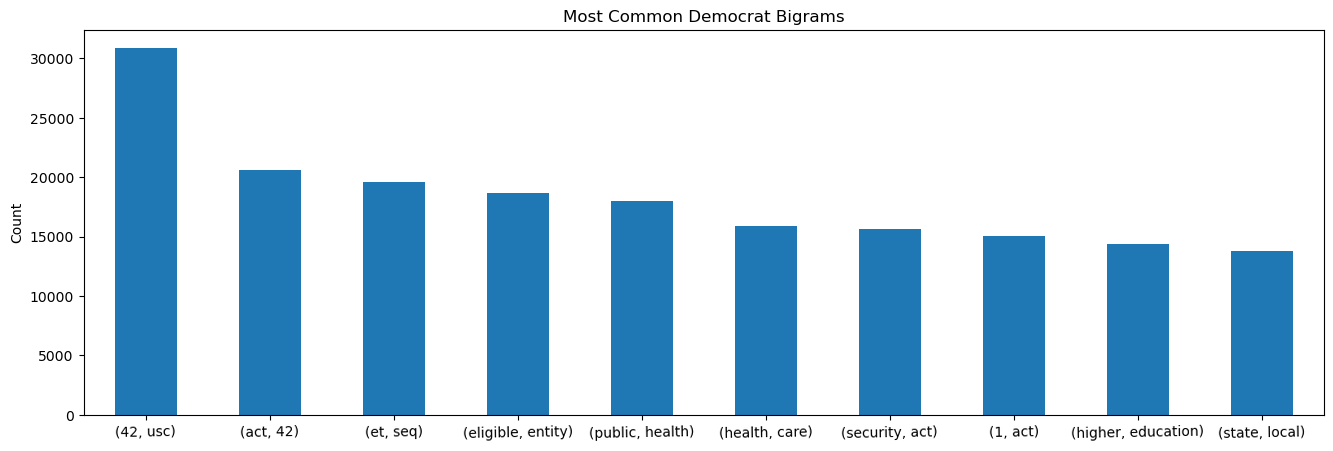

In [43]:
top_dem_bigrams = dem_bigrams.value_counts().head(10)
top_dem_bigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Democrat Bigrams')
plt.ylabel('Count')
plt.show()

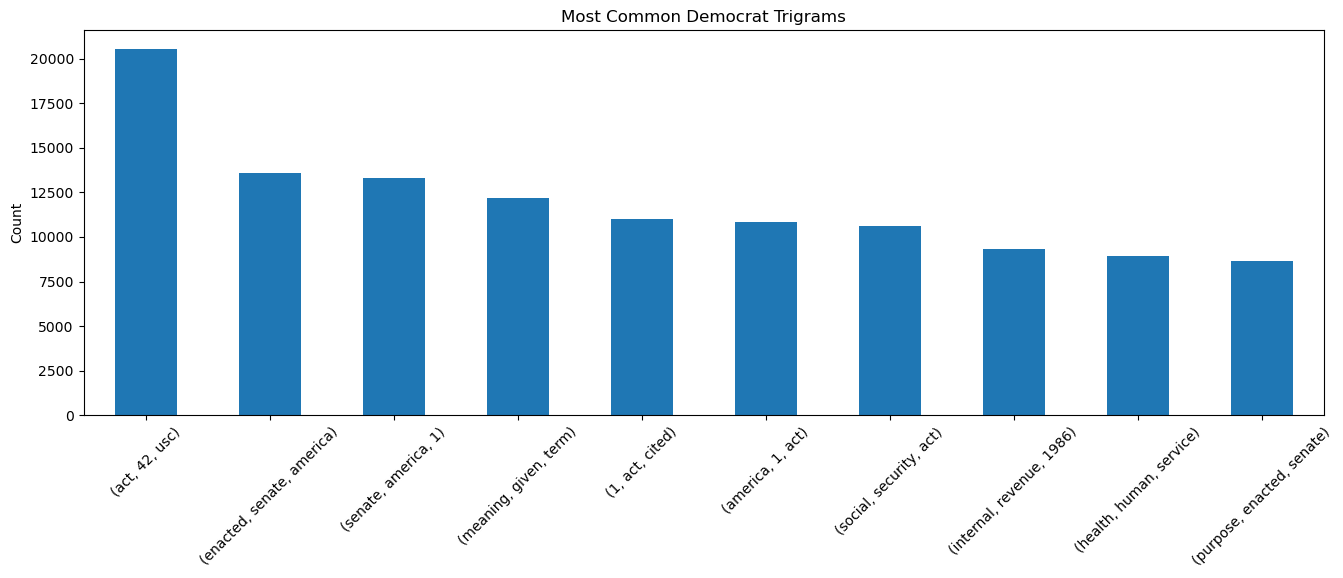

In [45]:
top_dem_trigrams = dem_trigrams.value_counts().head(10)
top_dem_trigrams.plot.bar(rot=45,figsize=(16, 5))
plt.title('Most Common Democrat Trigrams')
plt.ylabel('Count')
plt.show()

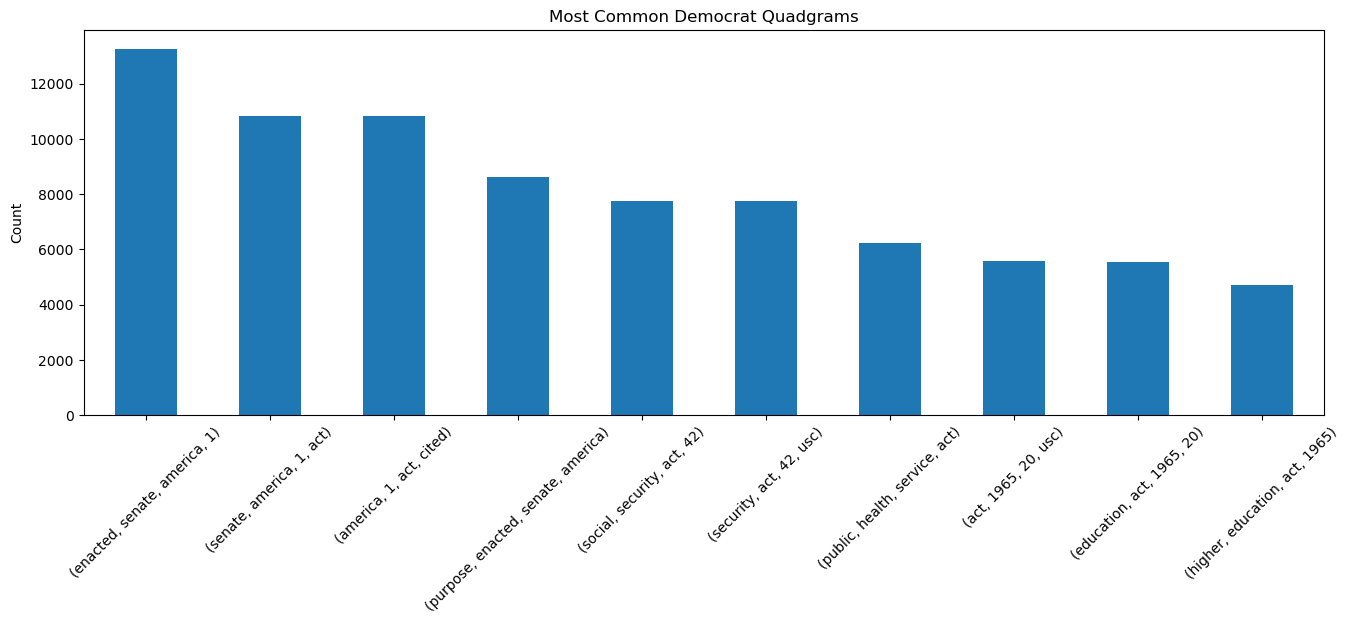

In [46]:
top_dem_quadgrams = dem_quadgrams.value_counts().head(10)
top_dem_quadgrams.plot.bar(rot=45,figsize=(16, 5))
plt.title('Most Common Democrat Quadgrams')
plt.ylabel('Count')
plt.show()

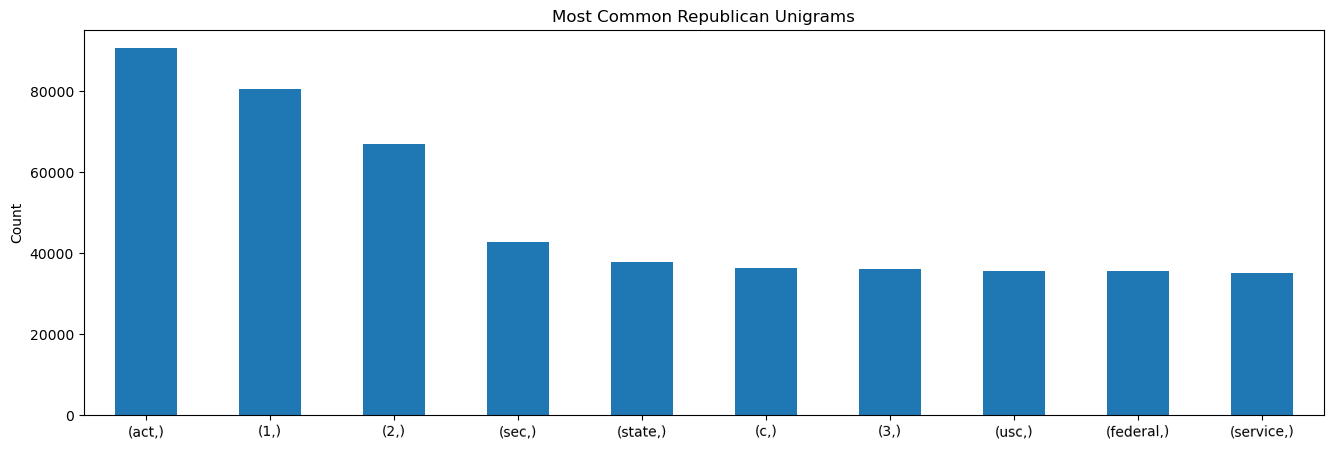

In [52]:
top_rep_unigrams = rep_unigrams.value_counts().head(10)
top_rep_unigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Republican Unigrams')
plt.ylabel('Count')
plt.show()

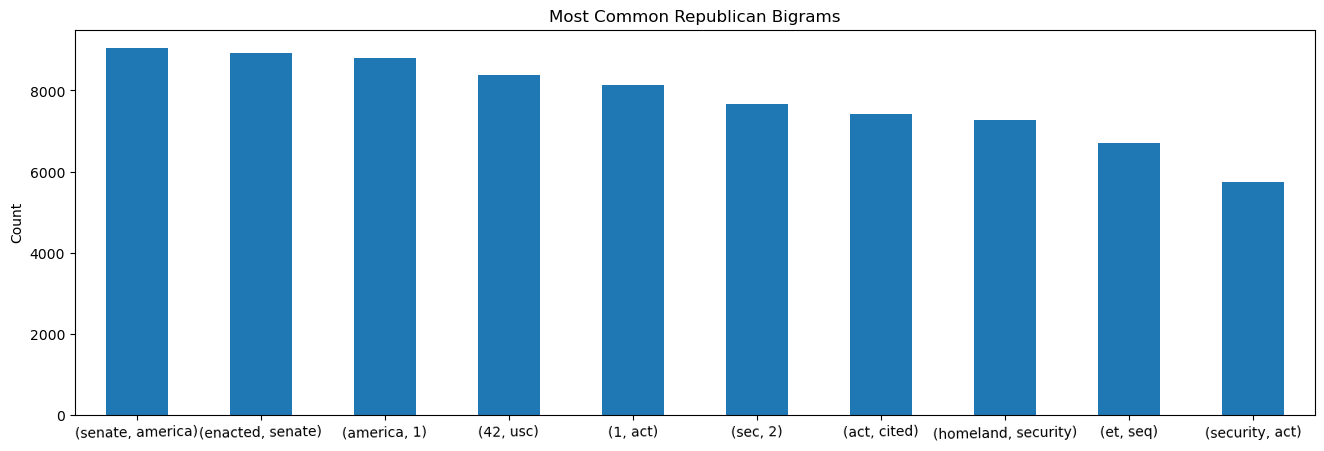

In [48]:
top_rep_bigrams = rep_bigrams.value_counts().head(10)
top_rep_bigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Republican Bigrams')
plt.ylabel('Count')
plt.show()

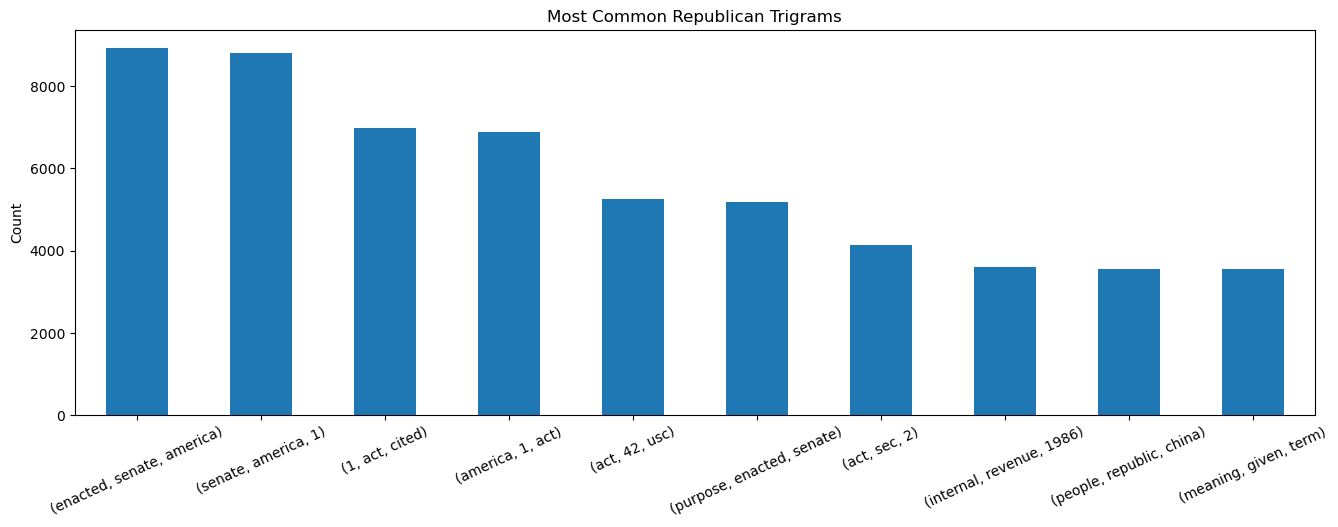

In [54]:
top_rep_trigrams = rep_trigrams.value_counts().head(10)
top_rep_trigrams.plot.bar(rot=25,figsize=(16, 5))
plt.title('Most Common Republican Trigrams')
plt.ylabel('Count')
plt.show()

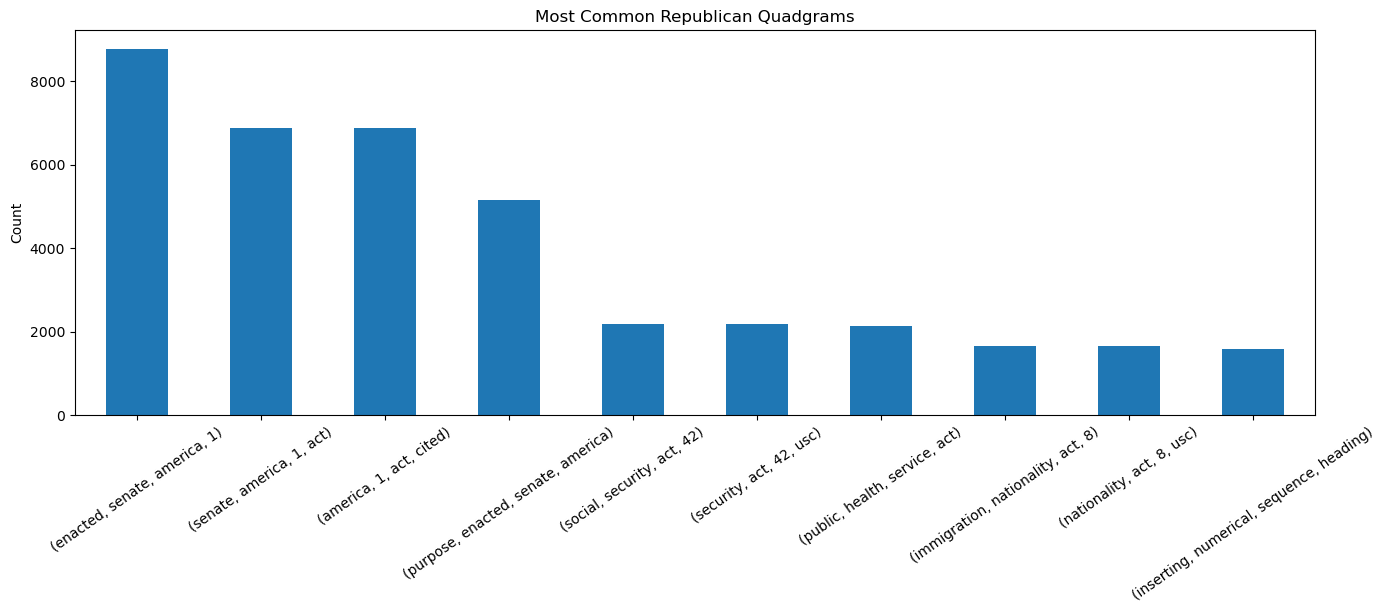

In [53]:
top_rep_quadgrams = rep_quadgrams.value_counts().head(10)
top_rep_quadgrams.plot.bar(rot=35,figsize=(16, 5))
plt.title('Most Common Republican Quadgrams')
plt.ylabel('Count')
plt.show()

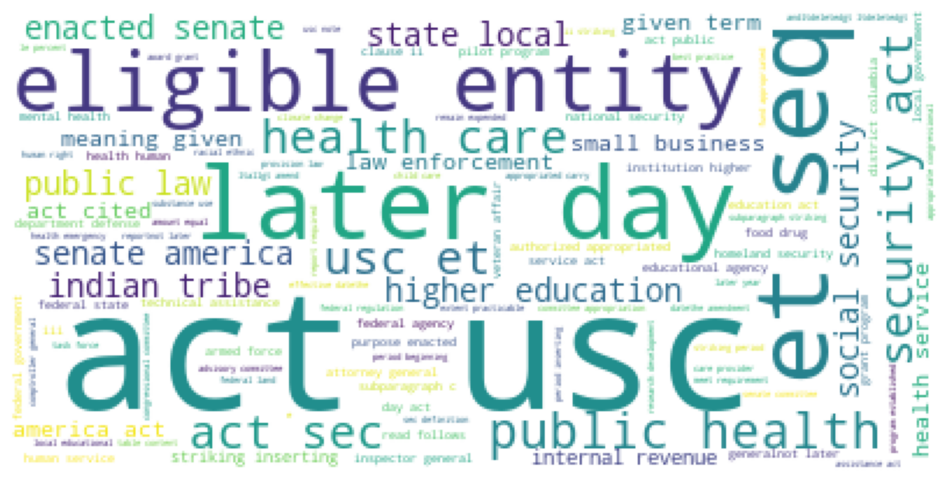

In [73]:
from wordcloud import WordCloud
#Word cloud
all_cloud1 = WordCloud(background_color='white').generate(' '.join(democrat_words))
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud1)
plt.axis('off')
plt.show()

In [119]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def shoe_cloud(x):
    
    dem_mask = np.array(Image.open("donkey.png"))
    # specify the shape of the mask image
    mask_shape = np.array(dem_mask).shape
    # create a 2D numpy array for transformed_dem_mask
    transformed_dem_mask = np.zeros(mask_shape, dtype=np.int32)

    for i in range(len(dem_mask)):
        transformed_dem_mask[i] = list(map(transform_format, dem_mask[i]))
        
    wc = WordCloud(background_color="white", max_words=150, mask=transformed_dem_mask, contour_width=.5, contour_color='blue')

    # Generate a wordcloud
    wc.generate(' '.join(x))

    # store to file
    #wc.to_file("dem.png")

    # show
    plt.figure(figsize=[12,8])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [122]:
# all_bill_words = clean_text(' '.join(df['bill_text']))
# shoe_cloud(all_bill_words)

In [121]:
# # Load the PNG image
# mask = np.array(Image.open("elephant.jpeg"))

# # Generate the word cloud
# wc = WordCloud(background_color="white", max_words=500, mask=mask, contour_width=4, contour_color='red')
# wc.generate(' '.join(republican_words))

# # Create a color function using the PNG image
# image_colors = ImageColorGenerator(mask)

# # Display the word cloud
# plt.figure(figsize=[12,8])
# plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# plt.show()

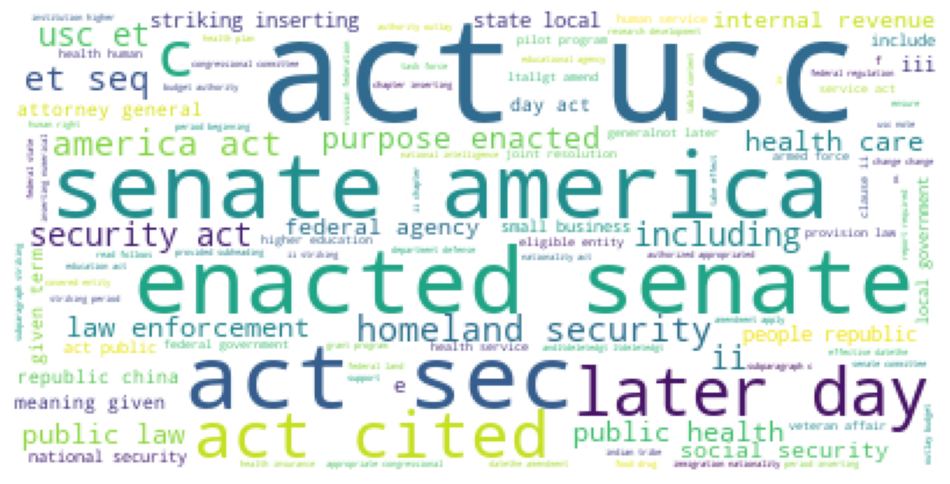

In [74]:
#Word cloud
all_cloud1 = WordCloud(background_color='white').generate(' '.join(republican_words))
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud1)
plt.axis('off')
plt.show()

In [123]:
df = df[(df.party == "D") | (df.party == "R")]

In [124]:
def vectorize_data(X_train, X_val, X_test, target_col):
    """
    Transforms data for modeling
    """
    #Creates object
    tfidf = TfidfVectorizer()
    
    #Uses object to change data
    X_train = tfidf.fit_transform(X_train[target_col])
    X_val = tfidf.transform(X_val[target_col])
    X_test = tfidf.transform(X_test[target_col])
    
    return X_train, X_val, X_test


In [125]:
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test, target_col='bill_text')

In [126]:
len(y_train[y_train == 'D'])/ len(y_train)

0.5997442455242967

In [139]:
rf_train_scores = []
rf_validate_scores = []
for i in range(1,20):
    loop_forest = RandomForestClassifier(max_depth=i, random_state=1969, max_samples=0.5)
    loop_forest.fit(X_train, y_train)
    rf_train_scores.append(loop_forest.score(X_train, y_train))
    rf_validate_scores.append(loop_forest.score(X_val, y_val))
rf_scores = {'train':rf_train_scores,'validate':rf_validate_scores}
rf_scores = pd.DataFrame(rf_scores)
rf_scores

,train,validate
0,0.599744,0.604428
1,0.599744,0.604428
2,0.599744,0.604428
3,0.599744,0.604428
4,0.600215,0.604899
5,0.604859,0.608197
6,0.616032,0.614165
7,0.629627,0.624686
8,0.645444,0.630967
9,0.660856,0.641489


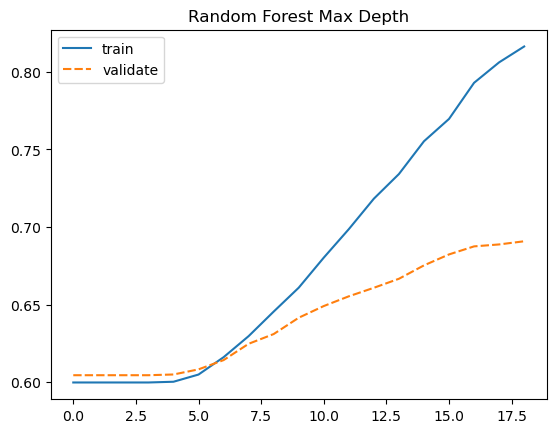

In [129]:
sns.lineplot(data = rf_scores)
plt.title("Random Forest Max Depth")
plt.show()

In [141]:
lr_2_train_scores = []
lr_2_validate_scores = []
solver_list_names=[]
c_value_list=[]

solver_list=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c_values = [100, 10, 1.0, 0.1, 0.01]

for i in solver_list:
    for j in c_values:
        logit_loop_2 = LogisticRegression(C=j, random_state=42, 
                               intercept_scaling=1, solver=i)    
        logit_loop_2.fit(X_train, y_train)
        
        lr_2_train_scores.append(logit_loop_2.score(X_train, y_train))
        lr_2_validate_scores.append(logit_loop_2.score(X_val, y_val))
        solver_list_names.append(i)
        c_value_list.append(j)
lr_2_scores = {'train':lr_2_train_scores,'validate':lr_2_validate_scores,'solver_list':solver_list_names,'c_values':c_value_list}
lr_2_scores = pd.DataFrame(lr_2_scores)
lr_2_scores["combo"]=lr_2_scores["c_values"].astype(str)
lr_2_scores["combo"]=lr_2_scores["combo"]+' '+lr_2_scores['solver_list']
lr_2_scores["iterations"]=range(1, 1+len(lr_2_scores))
print(lr_2_scores)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

       train  validate solver_list  c_values            combo  iterations
0   0.984655  0.765704   newton-cg    100.00  100.0 newton-cg           1
1   0.948109  0.769943   newton-cg     10.00   10.0 newton-cg           2
2   0.850249  0.752513   newton-cg      1.00    1.0 newton-cg           3
3   0.733140  0.705873   newton-cg      0.10    0.1 newton-cg           4
4   0.603581  0.607726   newton-cg      0.01   0.01 newton-cg           5
5   0.966348  0.764918       lbfgs    100.00      100.0 lbfgs           6
6   0.941244  0.767902       lbfgs     10.00       10.0 lbfgs           7
7   0.850249  0.752670       lbfgs      1.00        1.0 lbfgs           8
8   0.733208  0.705716       lbfgs      0.10        0.1 lbfgs           9
9   0.603581  0.607726       lbfgs      0.01       0.01 lbfgs          10
10  0.978597  0.764918   liblinear    100.00  100.0 liblinear          11
11  0.922803  0.763819   liblinear     10.00   10.0 liblinear          12
12  0.816866  0.743247   liblinear    

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


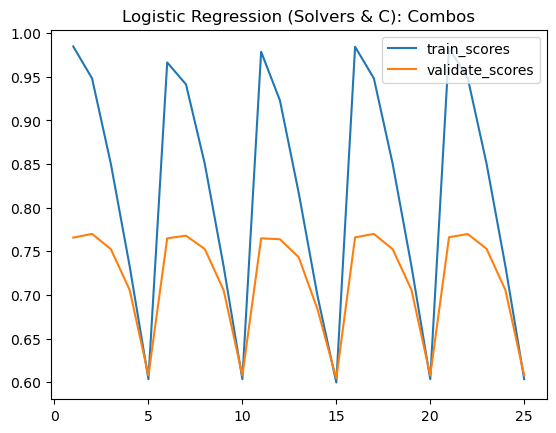

In [142]:
plt.plot(lr_2_scores['iterations'],lr_2_scores["train"],label='train_scores')
plt.plot(lr_2_scores['iterations'],lr_2_scores["validate"],label='validate_scores')
plt.legend()
plt.title("Logistic Regression (Solvers & C): Combos")
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

       train  validate
0   0.994414  0.747802
1   0.853749  0.716080
2   0.854489  0.716552
3   0.791022  0.695666
4   0.794656  0.710427
5   0.754678  0.692054
6   0.762821  0.698021
7   0.732737  0.682946
8   0.741082  0.691740
9   0.720420  0.678706
10  0.727958  0.683888
11  0.710728  0.674309
12  0.715776  0.681376
13  0.701844  0.670226
14  0.705613  0.678078
15  0.694912  0.671168
16  0.698479  0.675251
17  0.689595  0.663788
18  0.691277  0.667085
19  0.683470  0.662060


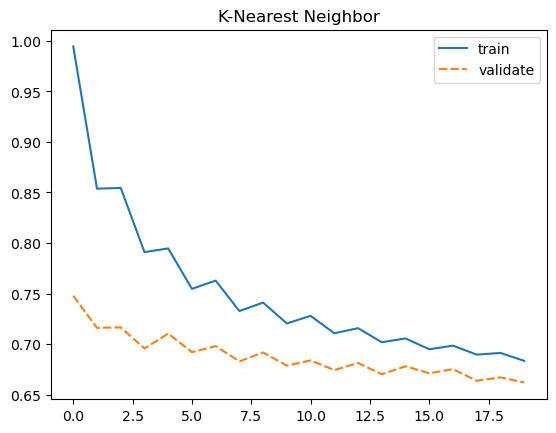

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn_train_scores = []
knn_validate_scores = []
for i in range(1,21):
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train, y_train)
    knn_train_scores.append(knn_loop.score(X_train, y_train))
    knn_validate_scores.append(knn_loop.score(X_val, y_val))
knn_scores = {'train':knn_train_scores,'validate':knn_validate_scores}
knn_scores = pd.DataFrame(knn_scores)
#knn_scores['difference'] = knn_train_scores - knn_validate_scores
print(knn_scores)

sns.lineplot(data=knn_scores)
plt.title("K-Nearest Neighbor")
plt.show()

      train  validate
0  0.599744  0.604428
1  0.617176  0.611181
2  0.625320  0.616834
3  0.631175  0.632067
4  0.645174  0.634736
5  0.657895  0.639761
6  0.669740  0.640704
7  0.686432  0.643373
8  0.696796  0.640075
9  0.707901  0.645258


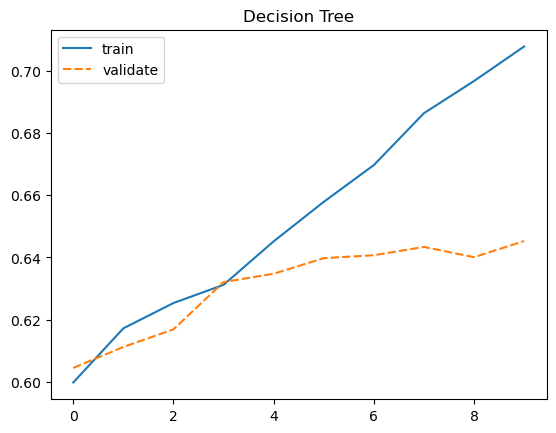

In [136]:
clf_train_scores = []
clf_validate_scores = []
for i in range(1,11):
    clf_loop = DecisionTreeClassifier(max_depth=i)
    clf_loop.fit(X_train, y_train)
    clf_train_scores.append(clf_loop.score(X_train, y_train))
    clf_validate_scores.append(clf_loop.score(X_val, y_val))
clf_scores = {'train':clf_train_scores,'validate':clf_validate_scores}
clf_scores = pd.DataFrame(clf_scores)
clf_scores['difference'] = clf_train_scores - clf_validate_scores
print(clf_scores)

sns.lineplot(data=clf_scores)
plt.title("Decision Tree")
plt.show()